**Проект Ритейл**

**Анализ программы лояльности**

Цель проекта - проанализировать программу лояльности, чтобы показать является ли она эффективной.

Задачи проекта:
- провести исследовательский анализ данных;
- получить основные ритейл-метрики по когортам у клиентов внутри программы лояльности и вне ее;
- проанализировать насколько сработала текущая программа лояльности;
- предложить способы повышения эффективности, обосновать использование других программ лояльности (в случае, если программа не эффективна);
- указать каких еще клиентов стоит подключить к программе лояльности в первую очередь (в случае, если программа достаточно эффективна);
- проверить гипотезы:
   - средний чек участников программы лояльности выше, чем у остальных покупателей
   - среднее количество чеков участников программы лояльности больше, чем у других покупателей.

Декомпозиция

Предобработка данных.
Исследовательский анализ данных:
Изучим за какой период имеющиеся данные. Все ли они нужны для дальнейшего анализа?
Посмотрим количество покупок по магазинам. Отличается ли количество покупок в разных магазинах?
Сравним средний чек по разным магазинам.
Какие магазины лидируют по продажам?
Влияет ли наличие программы лояльности на продажи в магазинах?
Определить средний чек клиентов программы лояльности и остальных.
Сравнить средние чеки клиентов по программе лояльности и остальных.
Посчитать среднее количество чеков для участников программы лояльности и для других покупателей.
Сравнить среднее количество чеков участников программы лояльности и остальных покупателей.
Сделать выводы: выше ли средний чек участников программы лояльности;
Сделать выводы: больше ли количество чеков у участников программы лояльности.

## Предобработка данных

### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats

from datetime import datetime, timedelta

In [2]:
retail = pd.read_csv('C:/Anna job/final project/retail_dataset.csv')
retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [4]:
product = pd.read_csv('C:/Anna job/final project/product_codes.csv')
product.head()

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


In [5]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


**Выводы:**

- не все названия столбцов стилистически корректны;
- есть пропущенные значения в столбце 'CustomerID';
- некорректные типы данных в столбцах 'purchasedate', 'customer_id', 'loyalty_program'. 


### Построим гистограммы для основных параметров

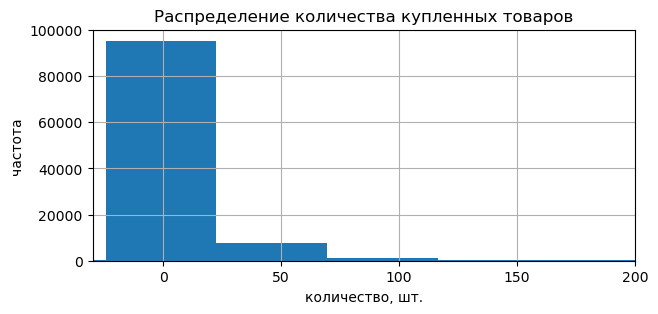

In [6]:
retail['Quantity'].hist(figsize=(7, 3), bins=3159)
plt.xlim([-30, 200])

plt.xlabel('количество, шт.')
plt.ylabel('частота')

plt.title('Распределение количества купленных товаров')

plt.show()

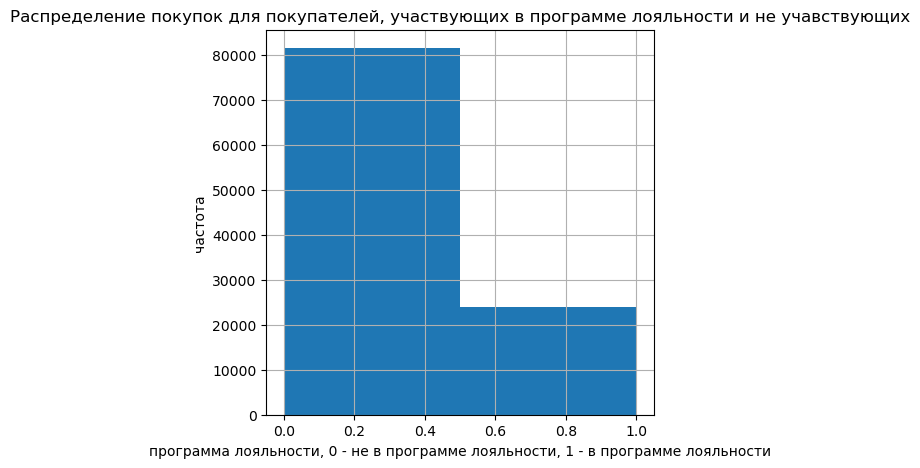

In [7]:
retail['loyalty_program'].hist(figsize=(5, 5), bins=2)

plt.xlabel('программа лояльности, 0 - не в программе лояльности, 1 - в программе лояльности')
plt.ylabel('частота')

plt.title('Распределение покупок для покупателей, участвующих в программе лояльности и не учавствующих')

plt.show()

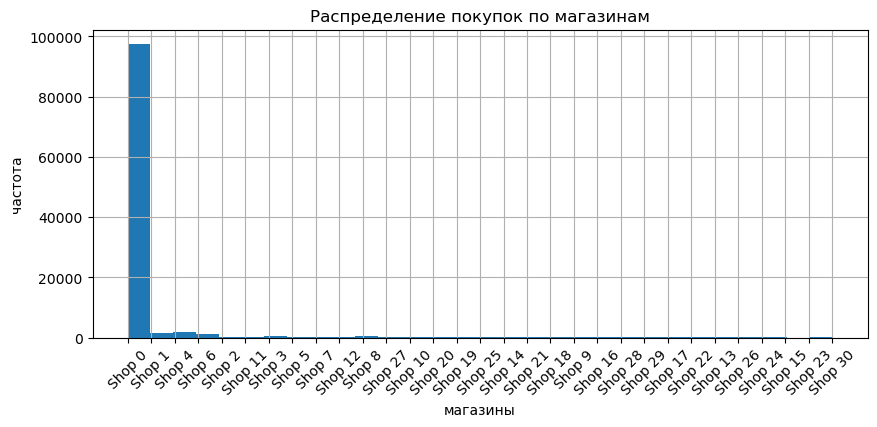

In [8]:
retail['ShopID'].hist(figsize=(10, 4), bins=31)

plt.xlabel('магазины')
plt.ylabel('частота')

plt.title('Распределение покупок по магазинам')
plt.xticks(rotation=45)

plt.show()

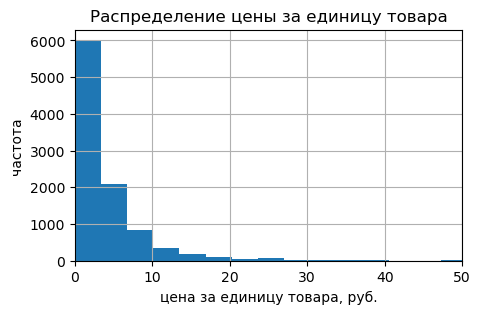

In [9]:
product['price_per_one'].hist(figsize=(5, 3), bins=5000)
plt.xlim([0, 50])

plt.xlabel('цена за единицу товара, руб.')
plt.ylabel('частота')

plt.title('Распределение цены за единицу товара')

plt.show()

**Выводы:**
- В основном в рамках одного чека товары покупались в количестве до 30 штук, редко в количестве от 30 до 70 и крайне редко свыше 100 штук. Важно отметить, что есть отрицательные значения для количества товаров. Необходимо рассмотреть данные значения;
- Более 80 000 покупок совершены покупателями, которые не принимают участие в программе лояльности и около 23 000 покупателями, которые принимают участие в программе лояльности;
- В основном все покупки совершаются в магазине 'Shop 0'. В остальных магазинах покупок очень мало, например как, в 'Shop 1', 'Shop 4', 'Shop 6' или совсем единичные покупки как в остальных магазинах. Возможно, что 'Shop 0' - это крупный офлайн гипермаркет и плюс интернет-магазин, а остальные магазины являются пунктами выдачи, в которых чаще всего забирают оплаченные товары. Данный вопрос я бы уточнила у коллег для лучшего понимания процессов;
- Большинство товаров с ценой от 0 до 3,3 рублей, в три раза меньше товаров с ценой от 3 рублей до 6,6 рублей. Товаров с ценой дороже 10 рублей достаточно мало.

**Общие выводы:**
- необходимо исправить названия столбцов (сделать строчные буквы, обозначить пробелы с помощью "_";
- изменить тип данных в столбцах: в 'purchasedate' на datetime, в 'customer_id' на object b d 'loyalty_program' на bool;
- есть пропущенные значения в столбце 'CustomerID', необходимо решить вопрос с их удалением;
- в данных есть аномальные значения количества в столбце 'Quantity'. Рассмотрим диаграмму "ящик с усами" и 95-й и 99-й перцентили, чтобы удалить выбросы;
- по графикам видно, что есть отрицательные и равные нулю значения для количества товаров в чеке. Необхоимо проверить эти значения и скорректировать при необходимости;
- проверим на наличие дубликатов.

### Скорректируем названия столбцов

In [10]:
retail.columns = retail.columns.str.lower()
print(retail.columns)

Index(['purchaseid', 'item_id', 'quantity', 'purchasedate', 'customerid',
       'shopid', 'loyalty_program'],
      dtype='object')


In [11]:
retail = retail.rename(
    columns = {
        'purchaseid': 'purchase_id',
        'purchasedate': 'purchase_date',
        'customerid': 'customer_id',
        'shopid': 'shop_id'
    }
)
print(retail.columns)

Index(['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id',
       'shop_id', 'loyalty_program'],
      dtype='object')


In [12]:
product = product.rename(
    columns = {
        'productID': 'product_id'
    }
)
print(product.columns)

Index(['product_id', 'price_per_one'], dtype='object')


### Преобразуем типы данных

In [13]:
retail['purchase_date'] = pd.to_datetime(retail['purchase_date'], format='%Y-%m-%d %H:%M:%S')

In [14]:
# Уберем 0 после запятой, преобразовав данные в тип Int64 
retail['customer_id'] = retail['customer_id'].astype('Int64')
retail.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1.0


In [15]:
retail['loyalty_program'] = retail['loyalty_program'].astype('bool')
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      69125 non-null   Int64         
 5   shop_id          105335 non-null  object        
 6   loyalty_program  105335 non-null  bool          
dtypes: Int64(1), bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 5.0+ MB


In [16]:
retail['customer_id'] = retail['customer_id'].astype('object')
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      69125 non-null   object        
 5   shop_id          105335 non-null  object        
 6   loyalty_program  105335 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 4.9+ MB


### Рассмотрим пропущенные значения

**Посчитаем количество пропусков в таблице retail**

In [17]:
retail.isna().sum()

purchase_id            0
item_id                0
quantity               0
purchase_date          0
customer_id        36210
shop_id                0
loyalty_program        0
dtype: int64

В столбце с ID покупателя (customer_id) большое количество пропусков - 36210.
Проверим, что покупатели без ID не учавствуют в программе лояльности.

**Рассмотрим принимают ли участие покупатели без ID в программе лояльности.**

In [18]:
print('Количество покупателей без ID, которые не принимают участия в программе лояльности равно',\
(retail.loc[retail['customer_id'].isna(), 'loyalty_program'] == 0.0).count())

Количество покупателей без ID, которые не принимают участия в программе лояльности равно 36210


**Вывод**

Все покупатели без ID не являются участниками программы лояльности и мы можем удалить их из дальнейшего анализа, не исказив данные.

In [19]:
retail = retail.dropna()
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69125 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchase_id      69125 non-null  object        
 1   item_id          69125 non-null  object        
 2   quantity         69125 non-null  int64         
 3   purchase_date    69125 non-null  datetime64[ns]
 4   customer_id      69125 non-null  object        
 5   shop_id          69125 non-null  object        
 6   loyalty_program  69125 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 3.8+ MB


**Посчитаем количество пропусков в таблице retail**

In [20]:
product.isna().sum()

product_id       0
price_per_one    0
dtype: int64

**Вывод**

Во второй таблице пропущенных значений нет

### Рассмотрим наличие аномальных значений количества в столбце 'quantity'

In [21]:
retail['quantity'].describe()

count    69125.000000
mean        10.986604
std        403.738782
min     -74216.000000
25%          1.000000
50%          4.000000
75%         11.000000
max      74214.000000
Name: quantity, dtype: float64

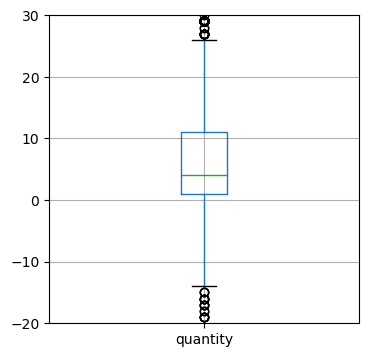

In [22]:
retail.boxplot(column=['quantity'], figsize=(4, 4))
plt.ylim([-20, 30])
plt.show()

**Вывод**

На основании диаграммы выбросами можем считать количества меньше -14 и больше 27.
Рассчитаем также 90-й, 95-й и 99-й перцентили.

In [23]:
print(np.percentile(retail['quantity'], [90, 95, 99]))

[ 23.  35. 119.]


**Вывод**

Не более 5% товаров в чеке были куплены с количеством больше 35 штук и не более 1% с количеством более 119 штук.
Разумно выбрать количество равное 35 за верхнюю границу, и отсеять аномальные количества по ней.

In [24]:
retail = retail[retail['quantity'] <= np.percentile(retail['quantity'], 95)]
retail

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,False
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,True
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,True
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,True
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,True
...,...,...,...,...,...,...,...
105328,537886,22158,7,2016-12-09 09:49:00,21339,Shop 0,False
105331,540247,21742,0,2017-01-05 15:56:00,21143,Shop 0,False
105332,538068,85048,1,2016-12-09 14:05:00,23657,Shop 0,True
105333,538207,22818,11,2016-12-10 11:33:00,18427,Shop 0,False


**Вывод**

На основании рассчета 95 прицентиля удалили не более 5% товаров, которые были куплены количеством более 35 штук, так эти значения в нашем случае являются аномальными.

### Рассмотрим количество таваров в столбце 'quantity' с отрицательным значением  и равные нулю

**Посчитаем значения, для которых количество товаров отрицательное.**

In [25]:
retail[retail['quantity'] < 0].count()

purchase_id        1805
item_id            1805
quantity           1805
purchase_date      1805
customer_id        1805
shop_id            1805
loyalty_program    1805
dtype: int64

**Посчитаем значения, для которых количество товаров равно нулю.**

In [26]:
retail[retail['quantity'] == 0].count()

purchase_id        13152
item_id            13152
quantity           13152
purchase_date      13152
customer_id        13152
shop_id            13152
loyalty_program    13152
dtype: int64

**Вывод**

- Строки с отрицательным количеством товаров - это по сути, возврат товаров, поэтому мы можем оставить эти данные для дальнейших исследований, так как они не будут мешать и даже могут помочь в уточнении общей картины.
- Строк с нулевым количеством товаров достаточно много 13152 - это 20%, поэтому удаление их может существенно исказить результаты исследований. Это могут быть подарочные товары по каким-то акциям, например 1+1/2+1 или "купи обои получи клей в подарок". Проведение подобных акций стоит уточнить у менеджеров.

### Проверим данные на наличие дубликатов

In [27]:
retail.duplicated().sum()

969

In [28]:
product.duplicated().sum()

0

**Вывод**

В таблице 'retail' есть дубликаты в количетсве 969, что составляет меньше 1,5%. Соответственно, можем удалить их.
Во второй таблице 'product' дубликатов нет.

In [29]:
retail = retail.drop_duplicates().reset_index(drop=True)

In [30]:
# проверим, что дубликаты удалены
retail.duplicated().sum()

0

### Cгруппируем таблицу 'product' по id товара и найдем медианное значение для каждого товара и добавим в таблицу 'retail' найденную цену для каждого id товара

In [31]:
product_grouped = product.groupby('product_id').agg({'price_per_one': 'median'}).reset_index()
product_grouped.columns = ['item_id', 'median_price_per_one']
product_grouped

,item_id,median_price_per_one
0,10002,1.630
1,10080,0.850
2,10120,0.210
3,10123C,0.650
4,10124A,0.420
...,...,...
3154,gift_0001_20,16.845
3155,gift_0001_30,25.265
3156,gift_0001_40,34.040
3157,gift_0001_50,42.550


In [32]:
#объеденим две таблицы
data = retail.merge(product_grouped)
data

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,median_price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,False,1.63
1,541566,21873,35,2017-01-19 11:50:00,23401,Shop 0,True,1.63
2,538843,21873,1,2016-12-14 13:18:00,21712,Shop 0,False,1.63
3,540838,21873,11,2017-01-11 15:13:00,19541,Shop 0,False,1.63
4,543592,21873,5,2017-02-10 11:57:00,22922,Shop 0,True,1.63
...,...,...,...,...,...,...,...,...
64794,541848,90073,1,2017-01-23 13:31:00,23290,Shop 0,True,5.02
64795,542731,17028J,5,2017-01-31 15:27:00,19279,Shop 0,False,0.42
64796,539261,16048,23,2016-12-16 14:34:00,21299,Shop 0,False,0.83
64797,C540246,79320,-2,2017-01-05 15:43:00,18760,Shop 0,False,4.95


In [33]:
# добавим колонку c общей ценой товаров
data['total_price'] = data['median_price_per_one'] * data['quantity']
data

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,median_price_per_one,total_price
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,False,1.63,17.93
1,541566,21873,35,2017-01-19 11:50:00,23401,Shop 0,True,1.63,57.05
2,538843,21873,1,2016-12-14 13:18:00,21712,Shop 0,False,1.63,1.63
3,540838,21873,11,2017-01-11 15:13:00,19541,Shop 0,False,1.63,17.93
4,543592,21873,5,2017-02-10 11:57:00,22922,Shop 0,True,1.63,8.15
...,...,...,...,...,...,...,...,...,...
64794,541848,90073,1,2017-01-23 13:31:00,23290,Shop 0,True,5.02,5.02
64795,542731,17028J,5,2017-01-31 15:27:00,19279,Shop 0,False,0.42,2.10
64796,539261,16048,23,2016-12-16 14:34:00,21299,Shop 0,False,0.83,19.09
64797,C540246,79320,-2,2017-01-05 15:43:00,18760,Shop 0,False,4.95,-9.90


In [34]:
# добавим колонку c месяцем покупки
data['purchase_month'] = data['purchase_date'].astype('datetime64[M]')
data

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,median_price_per_one,total_price,purchase_month
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,False,1.63,17.93,2016-12-01
1,541566,21873,35,2017-01-19 11:50:00,23401,Shop 0,True,1.63,57.05,2017-01-01
2,538843,21873,1,2016-12-14 13:18:00,21712,Shop 0,False,1.63,1.63,2016-12-01
3,540838,21873,11,2017-01-11 15:13:00,19541,Shop 0,False,1.63,17.93,2017-01-01
4,543592,21873,5,2017-02-10 11:57:00,22922,Shop 0,True,1.63,8.15,2017-02-01
...,...,...,...,...,...,...,...,...,...,...
64794,541848,90073,1,2017-01-23 13:31:00,23290,Shop 0,True,5.02,5.02,2017-01-01
64795,542731,17028J,5,2017-01-31 15:27:00,19279,Shop 0,False,0.42,2.10,2017-01-01
64796,539261,16048,23,2016-12-16 14:34:00,21299,Shop 0,False,0.83,19.09,2016-12-01
64797,C540246,79320,-2,2017-01-05 15:43:00,18760,Shop 0,False,4.95,-9.90,2017-01-01


## Исследовательский анализ

### Рассчитаем средний чек, среднее количество покупок в чеке и среднее количество чеков для пользователей, учавствующих в программе лояльности и не учавствующих

In [35]:
# сгруппируем по столбцу 'loyalty_program' и рассчитаем средний чек
loyalty_program = data.groupby('loyalty_program').agg({'total_price': 'sum', 'purchase_id': 'nunique', 'customer_id': 'nunique', 'quantity': 'sum'}).reset_index()
loyalty_program.columns = ['loyalty_program', 'total', 'purchase_cnt', 'customer_cnt', 'quantity_cnt']

# добавим среднюю сумму чека
loyalty_program['price_per_purchase'] = round(loyalty_program['total'] / loyalty_program['purchase_cnt'], 2)

# добавим среднее количество товаров в чеке
loyalty_program['quantity_per_purchase'] = round(loyalty_program['quantity_cnt'] / loyalty_program['purchase_cnt'], 2)

# среднее количество чеков на покупателя
loyalty_program['purchases_per_customer'] = round(loyalty_program['purchase_cnt'] / loyalty_program['customer_cnt'], 2)

loyalty_program

,loyalty_program,total,purchase_cnt,customer_cnt,quantity_cnt,price_per_purchase,quantity_per_purchase,purchases_per_customer
0,False,711775.88,2663,1130,191609,267.28,71.95,2.36
1,True,326458.79,1287,572,111151,253.66,86.36,2.25


**Вывод**

Средний чек, среднее количество покупок в чеке и количество чеков на покупателя выше для покупателей, которые не участвуют в программе лояльности.

Это может быть связано с тем, что покупатели, участвующие в программе лояльности совершили первую покупку позднее и не успели совершить такое же количесвто повторных покупок как покупатели, которые не учавствуют в программе лояльности. Чтобы это проверить рассчитаем LTV методом когортного анализа.

Также необходимо учесть, что программа лояльности платная, ее стоимость составляет 200 рублей и при рассчете пожизненной ценности клиента она должна быть учтена.

### Создадим профили покупателей, расчётаем LTV и построим графики.

**Функции для вычисления значений метрик:**

    get_profiles() — для создания профилей пользователей,
    get_ltv() — для подсчёта LTV.

**Функции для построения графиков:**

    filter_data() — для сглаживания данных,
    plot_ltv — для визуализации LTV.

**Функция get_profiles() — для создания профилей пользователей**

In [36]:
def get_profiles(data):
    profiles = (
    data.sort_values(by=['customer_id', 'purchase_date'])
    .groupby('customer_id')
    .agg(
        {
            'purchase_date': 'first',
            'shop_id': 'first',
            'loyalty_program': 'first',
            'purchase_id': 'nunique',
            'total_price': 'sum'
        }
    )
    .rename(columns={
        'purchase_date': 'first_purchase',
        'purchase_id': 'purchase_quantity',
        'total_price': 'total'
        }
    )
    .reset_index()
    )
    profiles['dt'] = profiles['first_purchase'].dt.date
    profiles['first_purchase_month'] = profiles['first_purchase'].astype('datetime64[M]')
    

    return profiles

**Создадим профили пользователей**

In [37]:
profiles = get_profiles(data)
profiles

,customer_id,first_purchase,shop_id,loyalty_program,purchase_quantity,total,dt,first_purchase_month
0,18025,2017-01-18 10:17:00,Shop 0,False,1,-77184.640,2017-01-18,2017-01-01
1,18026,2016-12-07 14:57:00,Shop 15,False,2,1736.520,2016-12-07,2016-12-01
2,18027,2016-12-16 19:09:00,Shop 22,False,2,200.765,2016-12-16,2016-12-01
3,18029,2017-02-02 16:01:00,Shop 5,False,1,386.180,2017-02-02,2017-02-01
4,18031,2017-02-16 12:33:00,Shop 5,False,1,390.170,2017-02-16,2017-02-01
...,...,...,...,...,...,...,...,...
1697,23938,2016-12-08 13:38:00,Shop 0,True,1,454.980,2016-12-08,2016-12-01
1698,23939,2016-12-16 18:23:00,Shop 0,True,3,791.575,2016-12-16,2016-12-01
1699,23948,2016-12-08 13:53:00,Shop 0,True,2,148.645,2016-12-08,2016-12-01
1700,23956,2017-01-25 12:34:00,Shop 0,True,1,-25.470,2017-01-25,2017-01-01


**Соединим таблицы, чтобы найти разницу между датой покупки и датой первой покупки.**

На основании количества дней присвоим категории:
- от 0 до 29 дней - 0
- от 30 до 59 дней - 30
- от 60 и больше - 60

In [38]:
data = data.merge(profiles[['customer_id', 'first_purchase']], on='customer_id', how='left')
data['delta'] = (data['purchase_date'] - data['first_purchase']).dt.days
data.head(5)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,median_price_per_one,total_price,purchase_month,first_purchase,delta
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,False,1.63,17.93,2016-12-01,2016-12-01 12:48:00,9
1,541566,21873,35,2017-01-19 11:50:00,23401,Shop 0,True,1.63,57.05,2017-01-01,2016-12-08 12:41:00,41
2,538843,21873,1,2016-12-14 13:18:00,21712,Shop 0,False,1.63,1.63,2016-12-01,2016-12-05 10:36:00,9
3,540838,21873,11,2017-01-11 15:13:00,19541,Shop 0,False,1.63,17.93,2017-01-01,2017-01-11 15:13:00,0
4,543592,21873,5,2017-02-10 11:57:00,22922,Shop 0,True,1.63,8.15,2017-02-01,2016-12-05 10:03:00,67


In [39]:
data.loc[data['delta'] >= 0, 'category'] = 0
data.loc[data['delta'] >= 30, 'category'] = 30
data.loc[data['delta'] >= 60, 'category'] = 60
data.head(5)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,median_price_per_one,total_price,purchase_month,first_purchase,delta,category
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,False,1.63,17.93,2016-12-01,2016-12-01 12:48:00,9,0.0
1,541566,21873,35,2017-01-19 11:50:00,23401,Shop 0,True,1.63,57.05,2017-01-01,2016-12-08 12:41:00,41,30.0
2,538843,21873,1,2016-12-14 13:18:00,21712,Shop 0,False,1.63,1.63,2016-12-01,2016-12-05 10:36:00,9,0.0
3,540838,21873,11,2017-01-11 15:13:00,19541,Shop 0,False,1.63,17.93,2017-01-01,2017-01-11 15:13:00,0,0.0
4,543592,21873,5,2017-02-10 11:57:00,22922,Shop 0,True,1.63,8.15,2017-02-01,2016-12-05 10:03:00,67,60.0


**Функция get_ltv() — для рассчета LTV**

In [40]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    data,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        data[['customer_id', 'purchase_date', 'total_price', 'category']],
        on='customer_id',
        how='left',
    )
    # учтем, что участие в программе лояльности стоит 200 рублей
    result_raw['num'] = result_raw.groupby(['customer_id', 'category'])\
    ['customer_id'].apply(lambda x: (x.shift() == x).cumsum())
    result_raw['price_loyalty'] = 0
    result_raw.loc[(result_raw['num'] == 0) & (result_raw['loyalty_program'] == True), 'price_loyalty'] = 200
    result_raw['total_price'] =  result_raw['total_price'] +  result_raw['price_loyalty']

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = ((
        result_raw['purchase_date'] - result_raw['first_purchase']
    ).dt.days)

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='total_price',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'customer_id': 'nunique'})
            .rename(columns={'customer_id': 'cohort_size'})
        )

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

**Рассчитаем LTV для покупателей, учавствующих в программе лояльности и не учавствующих**

In [41]:
observation_date = data['purchase_date'].max()  # момент анализа

horizon_days = 30  # горизонт анализа 
dimensions=['loyalty_program'] 

ltv_raw, ltv, ltv_history = get_ltv(
    profiles, data, observation_date, horizon_days, dimensions=dimensions
)

ltv

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,cohort_size,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
loyalty_program,,,,,,,,,,,,,,,,,,,,,
False,865,273.798601,282.596012,280.199434,286.036202,292.545006,294.370509,305.820775,327.278422,338.82737,...,391.003139,396.836214,399.401566,402.269624,405.159780,406.867000,408.548110,414.748723,418.909145,427.853416
True,448,478.810301,492.611172,503.351027,504.051864,506.897924,517.279208,525.424922,531.591473,536.23625,...,575.842690,577.597746,578.590926,581.494777,582.627377,585.727824,587.695558,591.803862,599.646741,601.493750


### Функция filter_data() — для сглаживания данных

In [42]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция plot_ltv() — для построения графика LTV

In [43]:
# функция для визуализации LTV

def plot_ltv(ltv, ltv_history, horizon_days, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon_days - 1]]


    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.ylabel('LTV')
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
   
    plt.tight_layout()
    plt.show() 

**Визуализируем LTV с разбивкой на покупателей, учавствующих в программе лояльности и не учавствующих**

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


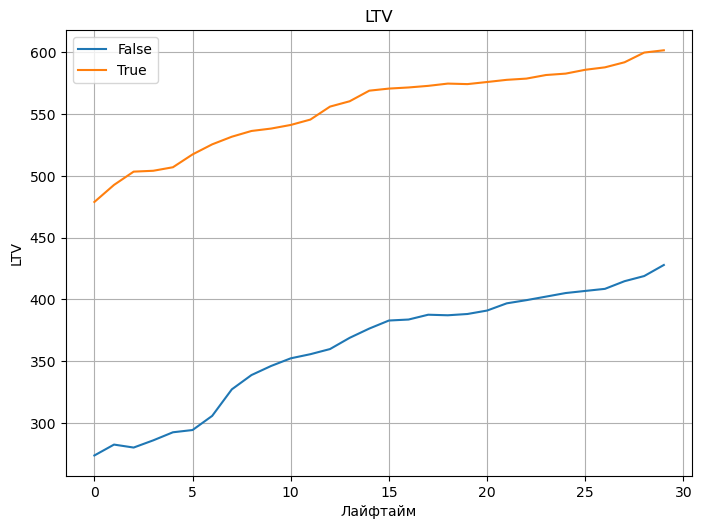

In [44]:
observation_date = data['purchase_date'].max()  # момент анализа

horizon_days = 30  # горизонт анализа 
dimensions=['loyalty_program']

# считаем LTV
ltv_raw, ltv_grouped, ltv_history = get_ltv(
    profiles, data, observation_date, horizon_days, dimensions
)

# строим графики
plot_ltv(
    ltv_grouped, ltv_history, horizon_days, window=14
)

**Выводы**

На основании LTV можем сделать вывод, что покупатели, которые учавствую в программе лояльности потратили в сумме денег больше за лайфтайм, в отличии от покупателей, которые не учавствуют в программе.

## Статистический анализ и проверка гипотез

**Формирование гипотез**

Основная задача проекта - это проверка приносят ли клиенты, учавствующие в программе лояльности больше денег.
Участники программы лояльности приносят больше денег, если они покупают на большую сумму. Это может быть достигнуто двумя путями:  выше средний чек покупки и/или они совершают покупки чаще.

Сформулируем нулевые гипотезы:

1)	Нулевая гипотеза - "Средний чек у покупателей из программы лояльности и для тех, которые не участвуют, не имеют статистически значимых различий";
    
    Альтернативная гипотеза - "В среднем чеке есть различия между покупателями из программы лояльности и теми, которые не участвуют в программе".

2)	Нулевая гипотеза - "Среднее количество чеков участников программы лояльности и для тех, которые не участвуют, не имеют статистически значимых различий";
    
    Альтернативная гипотеза - "Есть статистически значимые различия в среднем количестве чеков у участников программы лояльности и тех, кто в ней не участвует."



In [45]:
# Сгруппируем таблицу по ID покупателей и программе лояльности и рассчитае общее количество чеков,
#общую сумму покупок, средний чек и общее количество товаров для каждого покупателя
customers = data.groupby(['loyalty_program', 'customer_id']) \
                .agg({'purchase_id': 'nunique', 'total_price': 'sum', 'quantity': 'sum'}) \
                .reset_index()
customers.rename({'purchase_id': 'number_of_purchases', 'total_price': 'total_purchases', 'quantity': 'total_quantity'}, axis=1, inplace= True)
customers['mean_purchase'] = customers['total_purchases'] / customers['number_of_purchases']
customers.head(10)

,loyalty_program,customer_id,number_of_purchases,total_purchases,total_quantity,mean_purchase
0,False,18025,1,-77184.640,-74216,-77184.640000
1,False,18026,2,1736.520,574,868.260000
2,False,18027,2,200.765,120,100.382500
3,False,18029,1,386.180,180,386.180000
4,False,18031,1,390.170,83,390.170000
5,False,18035,1,2115.420,491,2115.420000
6,False,18038,2,1917.175,513,958.587500
7,False,18040,1,278.445,81,278.445000
8,False,18041,2,615.775,198,307.887500
9,False,18044,3,390.380,150,130.126667


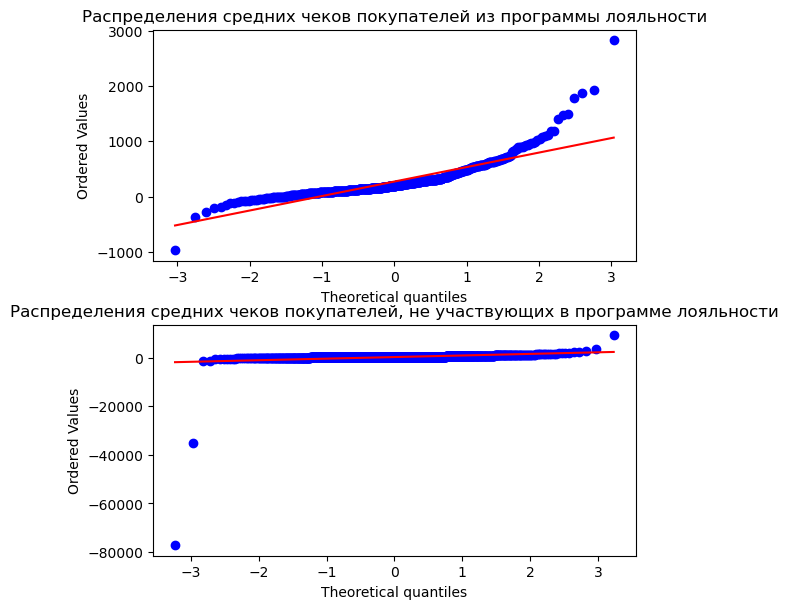

In [46]:
fig, ax = plt.subplots(2, 1, figsize=(6,6))
mean_purchase_0 = customers[customers['loyalty_program'] == True]['mean_purchase']
res = stats.probplot(mean_purchase_0, plot=ax[0])
ax[0].set_title('Распределения средних чеков покупателей из программы лояльности')
plt.tight_layout()


mean_purchase_1 = customers[customers['loyalty_program'] == False]['mean_purchase']
res = stats.probplot(mean_purchase_1, plot=ax[1])
ax[1].set_title('Распределения средних чеков покупателей, не участвующих в программе лояльности')


plt.show()

Будем использовать для проверки нулевой гипотезы тест Манн-Уитни.
Уровень значимости считаем в 5%.

In [47]:
# Проверка первой гипотезы 
alpha = 0.05
print('Критический уровень статистической значимости', alpha)
# Средний чек для покупателей в обеих группах

sample = customers.pivot_table(index=customers.index, values='mean_purchase', columns='loyalty_program')
p_value = stats.mannwhitneyu(sample[0].dropna(), sample[1].dropna())[1]
print("Значение p-value для сравнения среднего чека покупателей {0:.5f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия в среднем чеке покупателей")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем чеке нет")

Критический уровень статистической значимости 0.05
Значение p-value для сравнения среднего чека покупателей 0.00149
Отвергаем нулевую гипотезу: есть статистически значимые различия в среднем чеке покупателей


In [48]:
# Проверка второй гипотезы 
alpha = 0.05
print('Критический уровень статистической значимости', alpha)
# Среднее количество чеков на покупателя для обеих группах

sample = customers.pivot_table(index=customers.index, values='number_of_purchases', columns='loyalty_program', aggfunc='mean')
p_value = stats.mannwhitneyu(sample[0].dropna(), sample[1].dropna())[1]
print("Значение p-value для сравнения среднего чека покупателей {0:.5f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия в среднем количестве чеков на покупателя")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем количестве чеков на покупателя нет")

Критический уровень статистической значимости 0.05
Значение p-value для сравнения среднего чека покупателей 0.24980
Не получилось отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем количестве чеков на покупателя нет


## Общие выводы

- На этапе предообработки данных выявлены и устранены ошибки в названии колонок, изменены типы данных в столбцах в 'purchasedate', 'customer_id', 'loyalty_program'
- Найдены пропуски в ID покупателей. Так как не представляется возможным сделать им замену и они не участвуют в программе лояльности, то принято решение об их удалении.
- Также удалены дубликаты, их количество не превышало 1,5%
- В основном в рамках одного чека товары покупались в количестве до 30 штук, редко в количестве от 30 до 70 и крайне редко свыше 100 штук.
- Важно отметить, что есть отрицательные значения для количества товаров. Отрицательные количества вероятнее всего связаны с возвратами товаров и принято решение не удалять их, чтобы не исказить общую картину по покупкам и возвратам.
- Также в покупках представлено большое количество около 20% товаров с количеством 0 штук. Предположительно, это акцмонные.подарочные товары. Но необхоимо это уточнить с менеджером/руководителем. 
- Более 80 000 покупок совершены покупателями, которые не принимают участие в программе лояльности и около 23 000 покупателями, которые принимают участие в программе лояльности;
- В основном все покупки совершаются в магазине 'Shop 0'. В остальных магазинах покупок очень мало, например как, в 'Shop 1', 'Shop 4', 'Shop 6' или совсем единичные покупки как в остальных магазинах. Возможно, что 'Shop 0' - это крупный офлайн гипермаркет и плюс интернет-магазин, а остальные магазины являются пунктами выдачи, в которых чаще всего забирают оплаченные товары. Данный вопрос я бы уточнила у коллег для лучшего понимания процессов;
- Большинство товаров с ценой от 0 до 3,3 рублей, в три раза меньше товаров с ценой от 3 рублей до 6,6 рублей. Товаров с ценой дороже 10 рублей достаточно мало.
- Не более 5% товаров в чеке были куплены с количеством больше 35 штук и не более 1% с количеством более 119 штук. Чтобы отсять аномальные количества принимаем верхнюю границу от 35 штук.
- В результате проверки выяснили, что средний чек, среднее количество покупок в чеке и количество чеков на покупателя выше для покупателей, которые не участвуют в программе лояльности. Для уточнения провели расчет LTV методом когортного анализа.
- График измения LTV показывает, что данный показатель непрерывно растет, как для покупателей из программы лояльности, так и для остальных.
- Так же на основании LTV можно сделать вывод, что покупатели, которые учавствую в программе лояльности потратили в сумме денег больше за лайфтайм, в отличии от покупателей, которые не учавствуют в программе.
- Отвергаем нулевую гипотезу: есть статистически значимые различия в среднем чеке покупателей
- По среднему чеку для покупателей из программы лояльности и тех, кто не учавствует в программе (p-value<0.05). Значит, отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет. Соответственно, средний чек для покупателей, которые не учавствуют в программе лояльности выше, чем для тех которые учавствуют.
- По среднему количеству чеков для покупателей из программы лояльности и тех, кто не учавствует в программе не достигнута статистическая значимость (p-value>0.05). Значит не можем отвергнуть нулевую гипотезу о том, что в среднее количество чеков на покупателя не отличается для участников программы лояльности и других покупателей.
- В результате проверки гипотез можем сделать вывод о том, что средний чек для покупателей, которые учавствуют в программе лояльности выше, чем чек для покупателей из программы. При этом значимых различий в количестве чеков на покупателя между двумя эжими групамми нет. Также с учетом того, что участие в программе лояльности платное(200 рублей) при рассчете LTV установлено, что покупатели, которые учавствуют в программе лояльности приносят денег больше за весь лайфтайм.
- Рекоммендуется рассширить программу лояльности, а также подуамть над маркетинговыми программами и активностями, которые позволят увеличить средний чек для покупателей программы лояльности.